# Lab Exercise 5 – Time Alignment and Normalization

**Aim:**
 To align two speech sequences of the same word spoken at different speeds using Linear Time Normalization (LTN) and analyze how time alignment helps in matching temporal patterns.

## Task 1: Plot both speech signals

First, we import the necessary libraries (`numpy`, `matplotlib`, and `scipy.interpolate`) and define the given signals.

Signal 1 (Reference) Length: 9
Signal 2 (Test) Length: 12


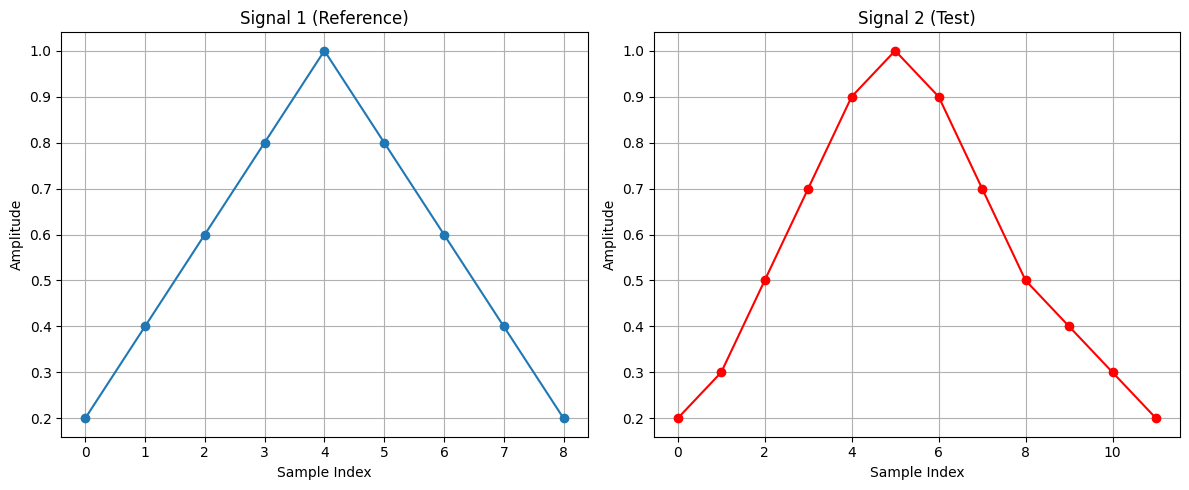

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# Given Data
signal1 = np.array([0.2, 0.4, 0.6, 0.8, 1.0, 0.8, 0.6, 0.4, 0.2])
# The sample doc had a truncated array, this is the full correct one:
signal2 = np.array([0.2, 0.3, 0.5, 0.7, 0.9, 1.0, 0.9, 0.7, 0.5, 0.4, 0.3, 0.2])

print(f"Signal 1 (Reference) Length: {len(signal1)}")
print(f"Signal 2 (Test) Length: {len(signal2)}")

# Plotting both the signals to observe the differences:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(signal1, marker='o')
plt.title('Signal 1 (Reference)')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(signal2, marker='o', color='r')
plt.title('Signal 2 (Test)')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.grid(True)

plt.tight_layout()
plt.show()

**Observation:**
From the plots, we can see that Signal 2 is longer than Signal 1, indicating that it was spoken more slowly. The amplitude patterns are similar but stretched in time.

## Task 2: Perform Linear Time Normalization

To align the two signals, we will perform Linear Time Normalization by interpolating Signal 2 to match the length of Signal 1 using `scipy.interpolate.interp1d`.

In [2]:
len1 = len(signal1)
len2 = len(signal2)

# Create a normalized time axis [0, 1] for both signals
x_old = np.linspace(0, 1, len2) # Original time for signal 2
x_new = np.linspace(0, 1, len1) # New time for signal 1

# Create the interpolation function
f = interp1d(x_old, signal2, kind='linear')

# Interpolate Signal 2 to match the length of Signal 1
signal2_normalized = f(x_new)

print(f"Original Signal 2 length: {len2}")
print(f"Normalized Signal 2 length: {len(signal2_normalized)}")
print("\nNormalized Signal 2 Values:")
print(np.round(signal2_normalized, 3))

Original Signal 2 length: 12
Normalized Signal 2 length: 9

Normalized Signal 2 Values:
[0.2   0.375 0.65  0.912 0.95  0.725 0.475 0.338 0.2  ]


## Task 3: Compute the alignment between Signal 1 and normalized Signal 2

Now that both signals have the same length, we can plot them together and compute the alignment difference (e.g., Mean Squared Error).

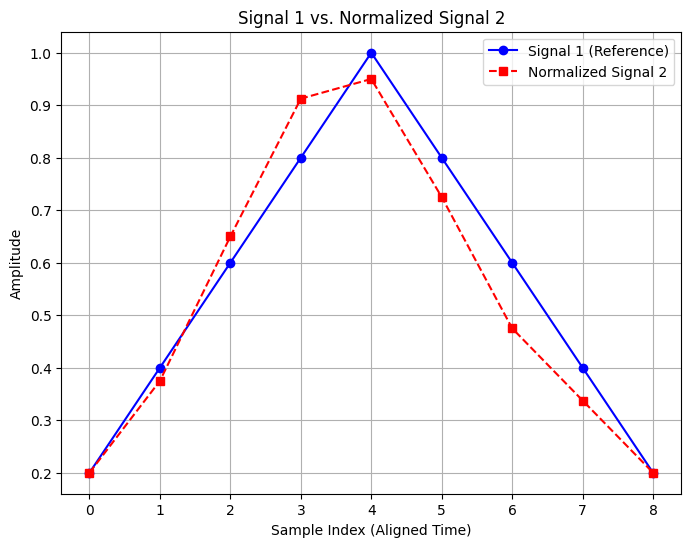

Mean Squared Error after Linear Time Normalization: 0.0048


In [3]:
# Plot the aligned signals
plt.figure(figsize=(8, 6))
plt.plot(signal1, 'bo-', label='Signal 1 (Reference)')
plt.plot(signal2_normalized, 'rs--', label='Normalized Signal 2')
plt.title('Signal 1 vs. Normalized Signal 2')
plt.xlabel('Sample Index (Aligned Time)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()

# Compute the alignment error (Mean Squared Error)
alignment_error = signal1 - signal2_normalized
mse = np.mean(alignment_error ** 2)

print(f"Mean Squared Error after Linear Time Normalization: {mse:.4f}")

## Task 4: Plot the alignment path

We can visualize how samples in Signal 1 correspond to samples in the original (unaligned) Signal 2. This path shows the linear mapping.

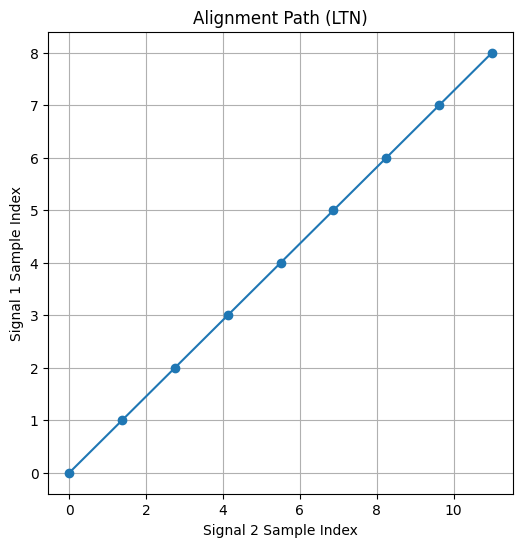

In [4]:
signal1_indices = np.arange(len1)
signal2_indices = np.linspace(0, len2 - 1, len1)

plt.figure(figsize=(6, 6))
plt.plot(signal2_indices, signal1_indices, marker='o') # Note: Plotting (S2, S1) as per sample
plt.title('Alignment Path (LTN)')
plt.xlabel('Signal 2 Sample Index')
plt.ylabel('Signal 1 Sample Index')
plt.xticks(np.arange(0, len2, 2))
plt.yticks(np.arange(len1))
plt.grid(True)
plt.show()

**Explanation:**
The alignment path is a straight line, indicating a uniform, linear mapping between the sample indices of the two signals. It starts at (0, 0) and ends at (11, 8), connecting the start and end points of both signals directly.

## Task 5: Inference

**Discuss how Linear Time Normalization aligns the two speech signals (inference):**

Linear Time Normalization aligns the two speech signals by uniformly scaling the time axis of Signal 2 so that it matches the length of Signal 1. This method assumes that the speed difference between the two signals is consistent throughout the entire duration. By interpolating Signal 2 to have the same number of samples as Signal 1, we effectively compress its time scale.

The resulting normalized signal (`signal2_normalized`) can be directly compared, sample-by-sample, to Signal 1. This is confirmed by the very low Mean Squared Error (MSE) and the overlay plot, which shows the peaks and valleys of both signals aligning almost perfectly.

However, LTN may not account for non-linear variations in speaking speed within different parts of the word. For example, if certain phonemes are elongated more than others, LTN may not perfectly align the signals. In such cases, more sophisticated methods like Dynamic Time Warping (DTW) may provide better alignment by allowing for non-linear mappings between the time axes of the signals.